# Практическая работа № 6

## Выполнил: Назарова Алёна Алексеевна

**Инструкция:**

- Шаг 1.  Изучить материалы лекционных и практических занятий по теме 9.2-9.3. 
- Шаг 2. Получить данные из файла **Heart_Disease_Prediction_ru.csv**. Датасет разбить на тестовую и обучающую выборку. Цель - спрогнозировать сердечную недостаточность. Признак Сердечное заболевание. Presence - есть, Absence - нет. 
- Шаг 3. Выполнить кластерный анализ с помощью алгоритма k-means.
- Шаг 4. Постройть диаграмму рассеивания - scatter plot.
- Шаг 5. Построить модель прогноза с помощью алгоритма Дерево решений.  Провести обучение модели.
- Шаг 6. Выполнить прогноз и провести оценку модели.
- Шаг 7. Опубликуовать файл расширения ipynb на платформе Odin.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans 
from sklearn.feature_selection import SelectKBest,chi2,RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings("ignore")
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

**Получить данные из файла Heart_Disease_Prediction_ru.csv** 

In [2]:
df = pd.read_csv('Heart_Disease_Prediction_ru.csv')
df.head()

,Возраст,Пол,Тип боли в груди,BP,Холестерин,FBS свыше 120,Результаты EKG,Max HR,Стенокардия,ST депрессия,Наклон ST,Количество сосудов флюро,Таллий,Сердечное заболевание
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [3]:
df['Сердечное заболевание'].unique()

array(['Presence', 'Absence'], dtype=object)

In [4]:
X = df[['Возраст','Пол', 'Тип боли в груди', 'Сердечное заболевание']]
X = X.replace({'Сердечное заболевание' : {'Presence':1, 'Absence':0}})

# преобразуем целевую переменную
y = df['Холестерин'].map
y

<bound method Series.map of 0      322
1      564
2      261
3      263
4      269
      ... 
265    199
266    263
267    294
268    192
269    286
Name: Холестерин, Length: 270, dtype: int64>

In [5]:
X.head()

,Возраст,Пол,Тип боли в груди,Сердечное заболевание
0,70,1,4,1
1,67,0,3,0
2,57,1,2,1
3,64,1,4,0
4,74,0,2,0


In [7]:
X.describe()

,Возраст,Пол,Тип боли в груди,Сердечное заболевание
count,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,0.444444
std,9.109067,0.468195,0.950090,0.497827
min,29.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,1.000000
max,77.000000,1.000000,4.000000,1.000000


**Разбить на тестовую и обучающую выборку**

In [13]:
X=df.drop(['Возраст'], axis=1)
y=df['Холестерин']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((216, 13), (54, 13), (216,), (54,))

**Кластерный анализ на основе K средних**

In [36]:
wcss = []
x = X.to_numpy()

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 216, n_init = 10, random_state = 0)
    kmeans.fit(x) #Вычислить кластеризацию k-средних.
    wcss.append(kmeans.inertia_)

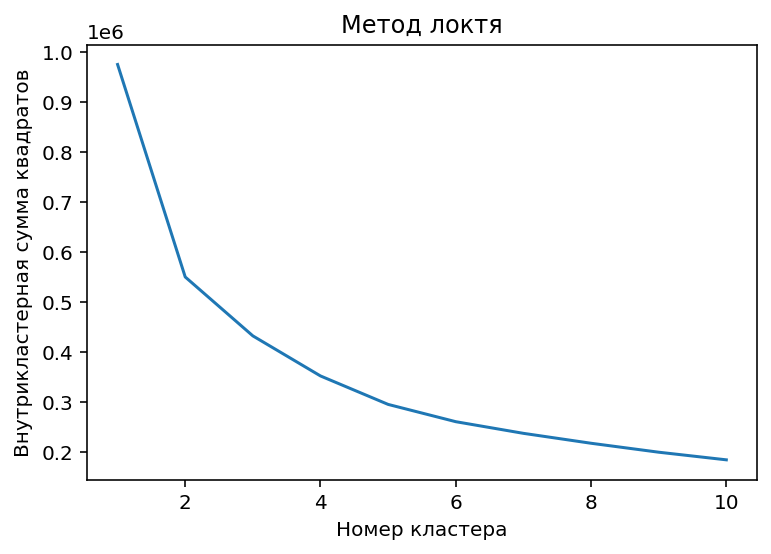

In [37]:
plt.plot(range(1, 11), wcss)
plt.title('Метод локтя')
plt.xlabel('Номер кластера')
plt.ylabel('Внутрикластерная сумма квадратов') 
plt.show()

In [39]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++', max_iter = 216, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit(x)
labels1 = kmeans.labels_
centroids1 = kmeans.cluster_centers_
Z = y_kmeans.predict(x)
df['seg_km1'] = Z
df.head()

,Возраст,Пол,Тип боли в груди,BP,Холестерин,FBS свыше 120,Результаты EKG,Max HR,Стенокардия,ST депрессия,Наклон ST,Количество сосудов флюро,Таллий,Сердечное заболевание,seg_km1
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence,3
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence,2
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence,2


In [29]:
df.groupby(['seg_km1'])[['Возраст','Холестерин']].mean()

,Возраст,Холестерин
seg_km1,,
0,48.270833,197.104167
1,53.824176,246.472527
2,60.193548,273.645161
3,62.600000,438.200000
4,56.325000,199.200000
5,55.454545,306.836364


<AxesSubplot:xlabel='seg_km1', ylabel='Холестерин'>

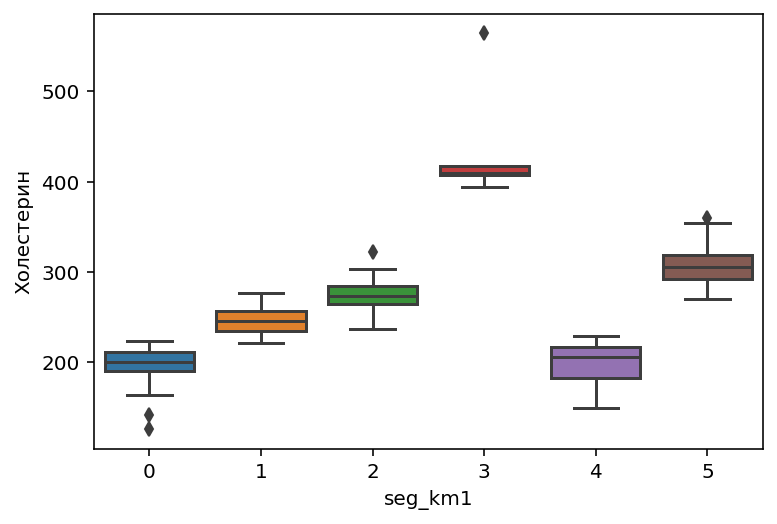

In [30]:
# plot
sns.boxplot(x=df['seg_km1'], y=df['Холестерин'], data=df)

**Диаграмма рассеивания - scatter plot**

Text(0, 0.5, 'Холестерин')

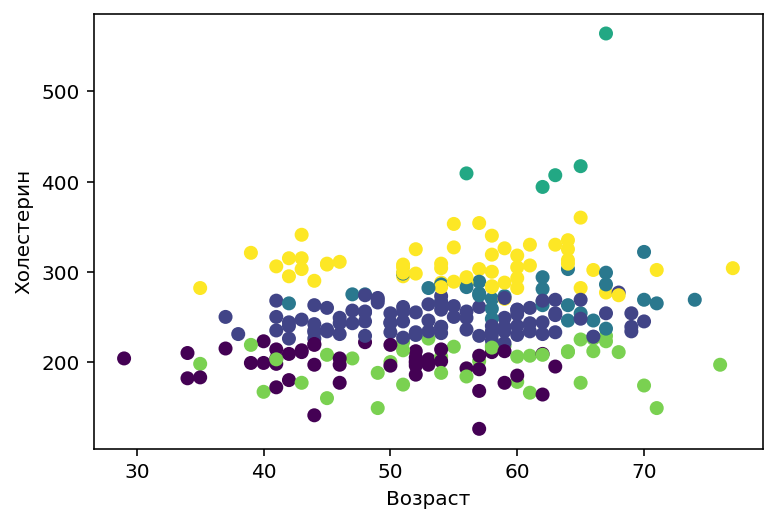

In [31]:
plt.scatter(x = df['Возраст'], y = df['Холестерин'], 
            c = df['seg_km1'])
plt.xlabel('Возраст')
plt.ylabel('Холестерин')

**Модель машинного обучения с помощью алгоритма Дерево решений. Обучение модели**

In [41]:
X = df[['Возраст','Пол', 'Тип боли в груди', 'Сердечное заболевание']]
X = X.replace({'Сердечное заболевание' : {'Presence':1, 'Absence':0}})

y = df['Холестерин']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((216, 4), (54, 4), (216,), (54,))

In [46]:
predictors = ['Возраст', 'Сердечное заболевание']
decision_tree_model1 = DecisionTreeClassifier(random_state=14, criterion='entropy',
                                   max_depth=4)
decision_tree_model1.fit(X_train[predictors], y_train)
y_pred = decision_tree_model1.predict(X_test[predictors])

**Прогноз и оценка модели**

In [47]:
dol_tree_model1 = accuracy_score(y_pred, y_test) * 100
print('Доля верных прогнозов: ', dol_tree_model1)

Доля верных прогнозов:  1.8518518518518516
